# KNN (K-Nearest-Neighbors)
## This algorithm is good for training smaller datasets upto 2000 rows max
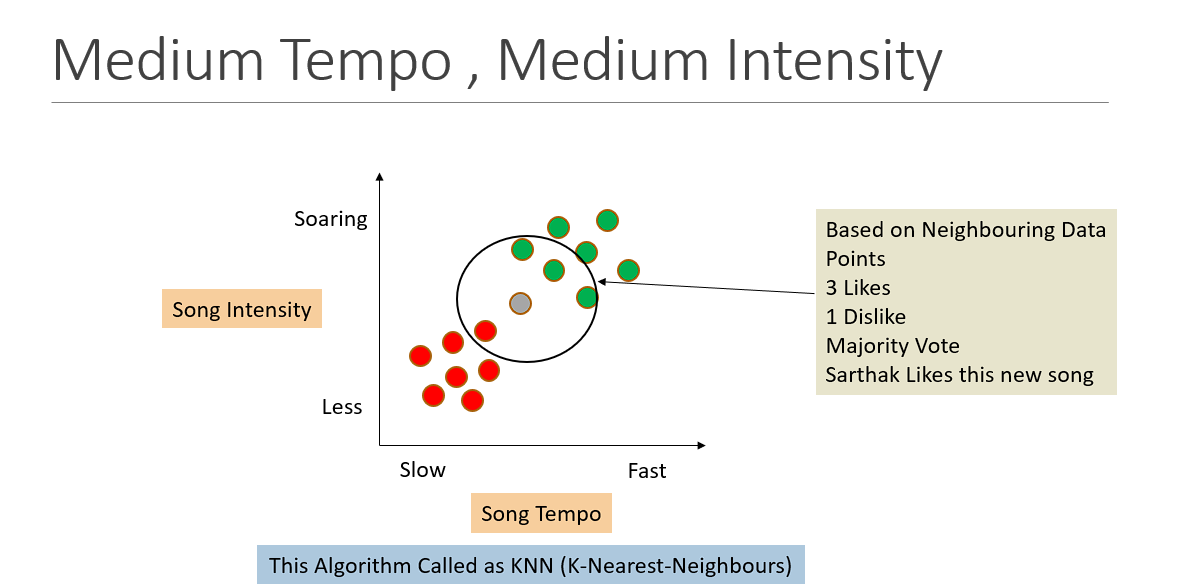

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step 2: Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

1

# Step 3: Seperate X and Y(species)

In [8]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# Step 4: Create a pipeline for X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [15]:
Xpre = num_pipe.fit_transform(X)
Xpre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Step 5: Apply train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(Xpre,Y , test_size=0.33 , random_state=42)


In [17]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [18]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [19]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [21]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [22]:
xtrain.shape

(100, 4)

In [23]:
ytrain.shape

(100, 1)

# Step 6: Build the models

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=31)
model1.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=31)

In [25]:
model1.score(xtrain, ytrain)

0.87

In [26]:
model1.score(xtest,ytest)

0.88

# Hyperparameter tuning

In [27]:
params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rscv1 = RandomizedSearchCV(knn, param_distributions=params, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10]},
                   scoring='f1_macro')

In [29]:
rscv1.best_params_

{'n_neighbors': 3}

In [30]:
rscv1.best_score_

0.9319552669552669

In [32]:
best_knn = rscv1.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

In [33]:
best_knn.score(xtrain,ytrain)

0.95

In [34]:
best_knn.score(xtest,ytest)

0.98

# Plot the confusion matrix

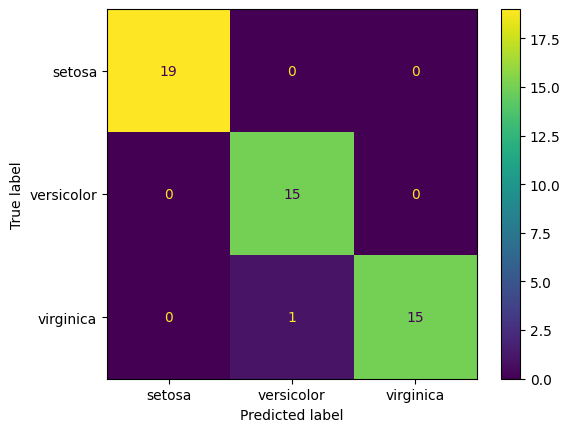

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn,xtest,ytest)

In [37]:
ypred_train = best_knn.predict(xtrain)
ypred_test = best_knn.predict(xtest)

In [38]:
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [39]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [40]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [41]:

ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [44]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(best_knn,xtrain,ytrain ,cv=5 , scoring='f1_macro' )
scores1

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [45]:
scores1.mean()

0.9319552669552669

# 2. SVM - Support Vector Machines

In [48]:
from sklearn.svm import SVC
model_svm =  SVC(probability=True)
model_svm.fit(xtrain,ytrain)

SVC(probability=True)

# Evaluate SVM

In [49]:
model_svm.score(xtrain, ytrain)

0.97

In [50]:
model_svm.score(xtest, ytest)

0.98

In [51]:
ypred_train1 = model_svm.predict(xtrain)
ypred_test1 = model_svm.predict(xtest)

In [52]:
ypred_train1[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [53]:
ypred_test1[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

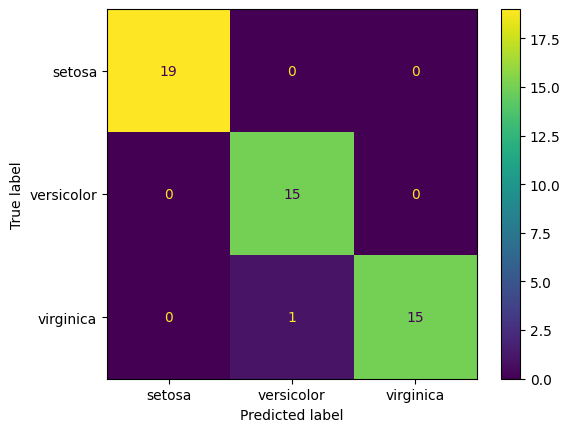

In [54]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtest, ytest)

In [55]:
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [56]:
scores2 = cross_val_score(model_svm, xtrain, ytrain, cv=5, scoring='f1_macro')
scores2

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [57]:
scores2.mean()

0.9319552669552669

# Lets use SVM for Predicting out of sample data

In [58]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [59]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [60]:
xnew_pre = num_pipe.transform(xnew)

In [61]:
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [62]:
preds = model_svm.predict(xnew_pre)
probs = model_svm.predict_proba(xnew_pre)

In [63]:
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [64]:
probs

array([[0.00700083, 0.9668234 , 0.02617577],
       [0.01178241, 0.02085883, 0.96735876],
       [0.02955474, 0.95491436, 0.0155309 ],
       [0.61838436, 0.29874913, 0.08286651],
       [0.01312028, 0.21614337, 0.77073635],
       [0.95682997, 0.02418594, 0.01898409],
       [0.04238376, 0.94494282, 0.01267343],
       [0.01014857, 0.040121  , 0.94973043],
       [0.96211167, 0.02138082, 0.01650751],
       [0.80317994, 0.14163529, 0.05518476],
       [0.01130328, 0.97998922, 0.0087075 ],
       [0.01159514, 0.98036976, 0.00803511],
       [0.01686302, 0.0204134 , 0.96272358],
       [0.01678475, 0.74439775, 0.23881749],
       [0.01887749, 0.58558648, 0.39553604]])

In [65]:
model_svm.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [66]:
import numpy as np 
max_probs = np.max(probs, axis=1)

In [67]:
max_probs

array([0.9668234 , 0.96735876, 0.95491436, 0.61838436, 0.77073635,
       0.95682997, 0.94494282, 0.94973043, 0.96211167, 0.80317994,
       0.97998922, 0.98036976, 0.96272358, 0.74439775, 0.58558648])

# Save above results to dataframe

In [68]:
xnew['species_pred'] = preds 
xnew['prob'] = max_probs

In [69]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.966823
1,6.9,3.1,5.1,2.3,virginica,0.967359
2,5.1,2.5,3.0,1.1,versicolor,0.954914
3,4.4,2.9,NaN,0.2,setosa,0.618384
4,5.9,3.0,5.1,1.8,virginica,0.770736
5,5.5,3.5,1.3,0.2,setosa,0.956830
6,5.6,NaN,3.6,1.3,versicolor,0.944943
7,6.5,3.0,5.2,2.0,virginica,0.949730
8,5.3,3.7,1.5,0.2,setosa,0.962112
9,5.1,3.4,1.5,NaN,setosa,0.803180


In [70]:

xnew.to_csv('SVM_results.csv', index=False)